In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the PCA version of the preprocessed training set in a Dataframe
training_set = pd.read_csv("dataset/pca/train.csv", index_col=0)
training_set.head()

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,Loan_Status
Loan_ID,,,,,,,,,,,
LP001002,1.841023,-0.050254,-0.398035,-0.134278,-0.805447,0.011900,-0.156415,-0.126621,-0.197218,-0.469712,1
LP001003,-0.755146,-0.412312,0.272855,-0.467618,0.927372,-0.208902,-0.338324,-0.048699,-0.113308,0.022866,0
LP001005,1.760603,0.074029,-0.320105,-0.337046,-0.790435,-0.815663,-0.208361,-0.071069,0.885642,-0.131981,1
LP001006,0.009642,-0.705032,0.910745,-0.298999,-0.971629,-0.344437,0.766788,-0.292883,-0.062571,0.148457,1
LP001008,1.006102,-0.239496,-0.686397,0.754601,-0.982966,0.086239,-0.050821,-0.156239,-0.250848,-0.439027,1


In [48]:
# Split the training set into Feature matrix and Target vector
X = training_set.iloc[:, :-1]
y = training_set.iloc[:, -1]

In [49]:
from sklearn.model_selection import train_test_split

# Split the Features and Targets into training set, and cross-validation set
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.2, random_state=22)

In [50]:
# Preview
X_train.head(3)

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10
Loan_ID,,,,,,,,,,
LP001993,-0.017911,-1.135904,0.511492,0.191566,0.907218,0.945534,-0.327562,-0.092263,-0.032746,0.357009
LP001431,-0.151136,-1.120333,0.865319,0.016774,-0.089189,1.115919,-0.032116,0.854178,0.028367,0.269894
LP002776,1.402064,-0.310247,-0.668395,0.397113,0.083151,0.624058,-0.005564,0.875970,-0.045898,0.311683


In [51]:
# Preview
X_cv.head(3)

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10
Loan_ID,,,,,,,,,,
LP002239,0.031897,-0.918208,0.666189,0.009390,0.011614,0.431554,0.774986,-0.380491,-0.180734,-0.355902
LP002175,-0.106290,-0.764784,0.832238,-0.112443,-1.068935,-0.333896,-0.176848,-0.060931,-0.067019,0.032437
LP002618,-1.001550,-0.497392,0.509621,-0.546864,0.969254,-0.138778,0.620609,-0.288945,-0.108309,0.138667


In [52]:
y_train.head(3)

Loan_ID
LP001993    1
LP001431    1
LP002776    0
Name: Loan_Status, dtype: int64

In [53]:
y_cv.head(3)

Loan_ID
LP002239    1
LP002175    1
LP002618    0
Name: Loan_Status, dtype: int64

In [54]:
# Conduct Exhaustive pair-wise selection of Principal components.
# The goal is to find the pair with highest evaluation score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

N_ENSEMBLE_ESTIMATORS = 100

# If you want to try a different model, simply change the reference of this variable.
CLASSIFIERS = [
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    SVC(),
    GaussianNB(),

    RandomForestClassifier(n_estimators=N_ENSEMBLE_ESTIMATORS),

    VotingClassifier(
        estimators=[
            ("logistic_regression", LogisticRegression()),
            ("kneighbors", KNeighborsClassifier()),
            ("decision_tree", DecisionTreeClassifier()),
            ("svc", SVC()),
        ]
    ),
    
    BaggingClassifier(n_estimators=N_ENSEMBLE_ESTIMATORS,estimator=LogisticRegression()),
    BaggingClassifier(n_estimators=N_ENSEMBLE_ESTIMATORS,estimator=KNeighborsClassifier()),
    BaggingClassifier(n_estimators=N_ENSEMBLE_ESTIMATORS,estimator=DecisionTreeClassifier()),
    BaggingClassifier(n_estimators=N_ENSEMBLE_ESTIMATORS,estimator=SVC()),

    BaggingClassifier(n_estimators=N_ENSEMBLE_ESTIMATORS ,bootstrap=False, estimator=LogisticRegression()),
    BaggingClassifier(n_estimators=N_ENSEMBLE_ESTIMATORS ,bootstrap=False, estimator=KNeighborsClassifier()),
    BaggingClassifier(n_estimators=N_ENSEMBLE_ESTIMATORS ,bootstrap=False, estimator=DecisionTreeClassifier()),
    BaggingClassifier(n_estimators=N_ENSEMBLE_ESTIMATORS ,bootstrap=False, estimator=SVC()),

    AdaBoostClassifier(algorithm="SAMME", n_estimators=N_ENSEMBLE_ESTIMATORS, estimator=LogisticRegression()),
    AdaBoostClassifier(algorithm="SAMME", n_estimators=N_ENSEMBLE_ESTIMATORS, estimator=DecisionTreeClassifier()),
    AdaBoostClassifier(algorithm="SAMME", n_estimators=N_ENSEMBLE_ESTIMATORS, estimator=SVC()),

    GradientBoostingClassifier(n_estimators=N_ENSEMBLE_ESTIMATORS),
]


# Don't include the last column since it is our target variable `Loan_Status`
PRINCIPAL_COMPONENTS = training_set.columns[:-1] 

# Define the Metric Comparison table
metrics = [accuracy_score, precision_score, recall_score, f1_score]
metric_table = pd.DataFrame({
    "Classifier": [],
    "Axis-1": [],
    "Axis-2": [],
    "Accuracy Score": [],
    "Precision Score": [],
    "Recall Score": [],
    "F1 Score": [],
})

for classifier in CLASSIFIERS:
    for axis1 in PRINCIPAL_COMPONENTS:
        for axis2 in PRINCIPAL_COMPONENTS:
            if axis1 == axis2:
                continue

            # Train the classifer on the current pair of principal components.
            classifier.fit(X=X_train.loc[:, [axis1,axis2]], y=y_train)

            # Predict unseen data from the cross-validation set
            y_pred_cv = classifier.predict(X_cv.loc[:, [axis1,axis2]])

            # Calculate the classification metrics and append them to the metric table
            metric_table.loc[len(metric_table)] = [
                classifier,
                axis1,
                axis2,
                accuracy_score(y_cv, y_pred_cv),
                precision_score(y_cv, y_pred_cv),
                recall_score(y_cv, y_pred_cv),
                f1_score(y_cv, y_pred_cv),
            ]

In [60]:
top_10_models = metric_table.sort_values(by=["Accuracy Score"], ascending=False).head(10)
top_10_models

,Classifier,Axis-1,Axis-2,Accuracy Score,Precision Score,Recall Score,F1 Score
789,"(KNeighborsClassifier(), KNeighborsClassifier(...",PC-8,PC-7,0.845528,0.821782,0.988095,0.897297
1671,([DecisionTreeRegressor(criterion='friedman_ms...,PC-6,PC-8,0.845528,0.815534,1.000000,0.898396
573,VotingClassifier(estimators=[('logistic_regres...,PC-4,PC-8,0.845528,0.828283,0.976190,0.896175
1688,([DecisionTreeRegressor(criterion='friedman_ms...,PC-8,PC-6,0.845528,0.815534,1.000000,0.898396
606,VotingClassifier(estimators=[('logistic_regres...,PC-8,PC-4,0.845528,0.828283,0.976190,0.896175
609,VotingClassifier(estimators=[('logistic_regres...,PC-8,PC-7,0.837398,0.820000,0.976190,0.891304
600,VotingClassifier(estimators=[('logistic_regres...,PC-7,PC-8,0.837398,0.820000,0.976190,0.891304
780,"(KNeighborsClassifier(), KNeighborsClassifier(...",PC-7,PC-8,0.837398,0.820000,0.976190,0.891304
963,"(SVC(random_state=1139583991), SVC(random_stat...",PC-8,PC-1,0.829268,0.800000,1.000000,0.888889
1056,"(LogisticRegression(random_state=474878778), L...",PC-8,PC-4,0.829268,0.800000,1.000000,0.888889


In [56]:
# Show the pairs with maximum metric score
max_metrics = pd.concat([
    metric_table.loc[metric_table["Accuracy Score"].idxmax()],
    metric_table.loc[metric_table["Precision Score"].idxmax()],
    metric_table.loc[metric_table["Recall Score"].idxmax()],
    metric_table.loc[metric_table["F1 Score"].idxmax()],
], axis=1)

max_metrics.columns = ["Max. Accuracy Score", "Max. Precision Score", "Max. Recall Score", "Max. F1 Score"]
max_metrics.T

,Classifier,Axis-1,Axis-2,Accuracy Score,Precision Score,Recall Score,F1 Score
Max. Accuracy Score,VotingClassifier(estimators=[('logistic_regres...,PC-4,PC-8,0.845528,0.828283,0.97619,0.896175
Max. Precision Score,"(KNeighborsClassifier(), KNeighborsClassifier(...",PC-8,PC-4,0.821138,0.829787,0.928571,0.876404
Max. Recall Score,LogisticRegression(),PC-1,PC-2,0.682927,0.682927,1.0,0.811594
Max. F1 Score,([DecisionTreeRegressor(criterion='friedman_ms...,PC-6,PC-8,0.845528,0.815534,1.0,0.898396


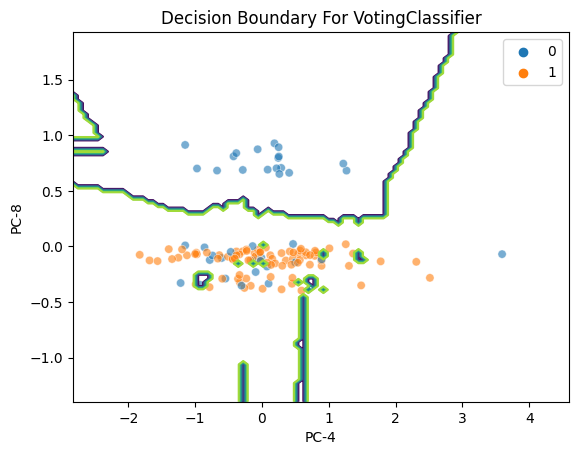

In [61]:
# Visualize the decision function of the best pair of principal components
from sklearn.inspection import DecisionBoundaryDisplay

# Modify the target metric below if you want to see the most effective PCA pair for other metrics.
target_metric = "Accuracy Score"

best_pair_id = metric_table[target_metric].idxmax()
best_classifier = metric_table.loc[best_pair_id]["Classifier"]
best_axis1 = metric_table.loc[best_pair_id]["Axis-1"]
best_axis2 = metric_table.loc[best_pair_id]["Axis-2"]

# Train the best classifier on the training set
best_classifier.fit(X_train.loc[:, [best_axis1, best_axis2]], y_train)

# Predict unseen data from the cross validation set.
y_pred_cv = best_classifier.predict(X_cv.loc[:, [best_axis1, best_axis2]])

display = DecisionBoundaryDisplay.from_estimator(
    estimator=best_classifier,
    X = X_cv.loc[:, [best_axis1, best_axis2]],
    response_method="predict",
    plot_method="contour",
    xlabel=best_axis1,
    ylabel=best_axis2,
)

sns.scatterplot(data=X_cv, x=best_axis1, y=best_axis2, hue=y_cv, alpha=0.6).set(title=f"Decision Boundary For {type(best_classifier).__name__}")

plt.legend()

              precision    recall  f1-score   support

           0       0.92      0.56      0.70        39
           1       0.83      0.98      0.90        84

    accuracy                           0.85       123
   macro avg       0.87      0.77      0.80       123
weighted avg       0.86      0.85      0.83       123



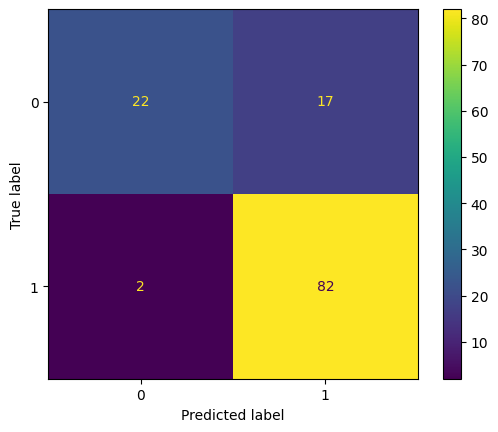

In [62]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Check the classification report and the confusion matrix
print(classification_report(y_cv, y_pred_cv))
ConfusionMatrixDisplay(confusion_matrix(y_true=y_cv, y_pred=y_pred_cv)).plot();

In [76]:
# Combine the top performing classifers into a stacking classifier
final_classifier = StackingClassifier(
    estimators=[
        (
            "voting_classifier",
            VotingClassifier(
                estimators=[
                    ("logistic_regression", LogisticRegression()),
                    ("kneighbors", KNeighborsClassifier()),
                    ("decision_tree", DecisionTreeClassifier()),
                    ("svc", SVC()),
                ]
             )
        ),
        (
            "gradiant_boosting_classifier",
            GradientBoostingClassifier(n_estimators=N_ENSEMBLE_ESTIMATORS)
        ),
        (
            "bagging_svc_classifier",
            BaggingClassifier(n_estimators=N_ENSEMBLE_ESTIMATORS,estimator=SVC())
        ),
        (
            "bagging_logistic_classifier",
            BaggingClassifier(n_estimators=N_ENSEMBLE_ESTIMATORS,estimator=LogisticRegression())
        )
        
        
    ],
    final_estimator=LogisticRegression(),
)

# Train the final combined classifier using the training set
final_classifier.fit(X_train.loc[:, [best_axis1, best_axis2]], y_train)

StackingClassifier(estimators=[('voting_classifier',
                                VotingClassifier(estimators=[('logistic_regression',
                                                              LogisticRegression()),
                                                             ('kneighbors',
                                                              KNeighborsClassifier()),
                                                             ('decision_tree',
                                                              DecisionTreeClassifier()),
                                                             ('svc', SVC())])),
                               ('gradiant_boosting_classifier',
                                GradientBoostingClassifier()),
                               ('bagging_svc_classifier',
                                BaggingClassifier(estimator=SVC(),
                                                  n_estimators=100)),
                               ('bagging_logistic_classifier',
                                BaggingClassifier(estimator=LogisticRegression(),
                                                  n_estimators=100))],
                   final_estimator=LogisticRegression())

In [75]:
# Predict unseen data from the cross validation set
y_pred_cv_final = final_classifier.predict(X_cv.loc[:, [best_axis1, best_axis2]])

pd.DataFrame({
    "Metric": ["accuracy_score", "precision_score", "recall_score", "f1_score"],
    "Value": [metric(y_cv, y_pred_cv) for metric in [accuracy_score, precision_score, recall_score, f1_score]]
})

,Metric,Value
0,accuracy_score,0.845528
1,precision_score,0.828283
2,recall_score,0.976190
3,f1_score,0.896175
